In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [3]:
df=pd.read_csv('D:/shree/bigdatamart_Test.csv')

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
df.shape

(5681, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


# Categorical Features:
Item_Identifier

Item_Fat_Content

Item_Type

Outlet_Identifier

Outlet_Size

Outlet_Location_Type

Outlet_Type

In [7]:
#checking for missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# Handling missing values

Mean--->avarage value

Mode--->most repeated value

In [8]:
df['Item_Weight'].mean()

12.695633368756374

Filling the missing value in Item weight with mean value

In [9]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [10]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Filling the missing value by mode in outlet size

In [11]:
mode_Outlet_Size=df.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))

In [12]:
print(mode_Outlet_Size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [13]:
df=df.astype({'Outlet_Size':'str'})

In [14]:
column_values = df[['Outlet_Size']]. values. ravel()
unique_values = pd. unique(column_values)
unique_values

array(['Medium', 'nan', 'Small', 'High'], dtype=object)

In [15]:
missing_values=df['Outlet_Size'].isnull()

In [16]:
print(missing_values)

0       False
1       False
2       False
3       False
4       False
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Outlet_Size, Length: 5681, dtype: bool


In [17]:
df.loc[missing_values, 'Outlet_Size']=df.loc[missing_values, 'Outlet_Size'].apply(lambda x: mode_Outlet_Size)

In [18]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Data Analysis

In [19]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# Numerical Features

In [20]:
sns.set()

<Figure size 432x432 with 0 Axes>

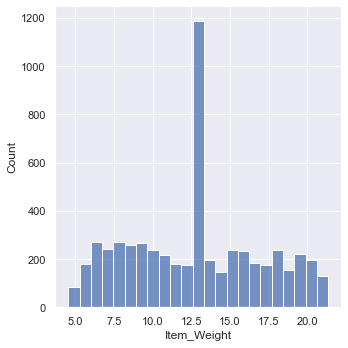

In [21]:
#Item weight distribution
plt.figure(figsize=(6,6))
sns.displot(df['Item_Weight'])
plt.show()

<Figure size 432x432 with 0 Axes>

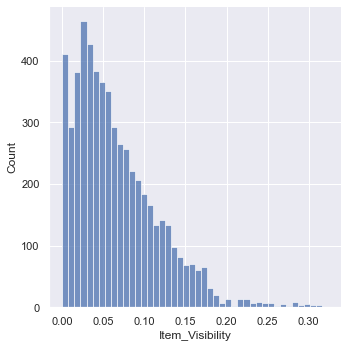

In [22]:
#Item Item_Visibilitydistribution
plt.figure(figsize=(6,6))
sns.displot(df['Item_Visibility'])
plt.show()

<Figure size 432x432 with 0 Axes>

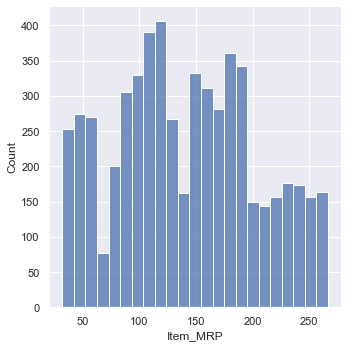

In [23]:
#Item Item_MRP distribution
plt.figure(figsize=(6,6))
sns.displot(df['Item_MRP'])
plt.show()

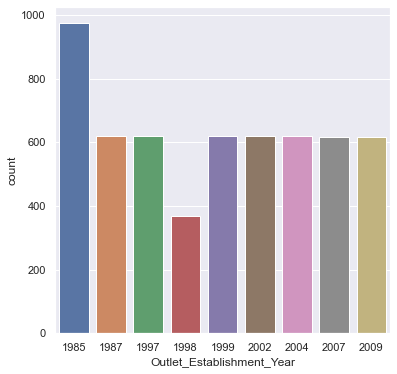

In [25]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data =df)
plt.show()

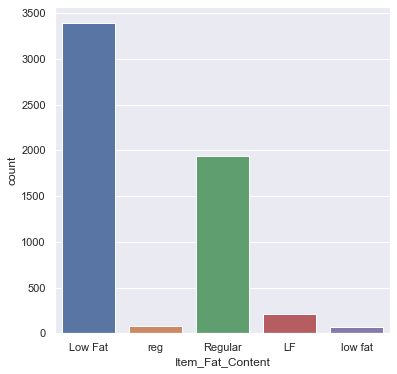

In [26]:
# Item_Fat_Content  column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data =df)
plt.show()

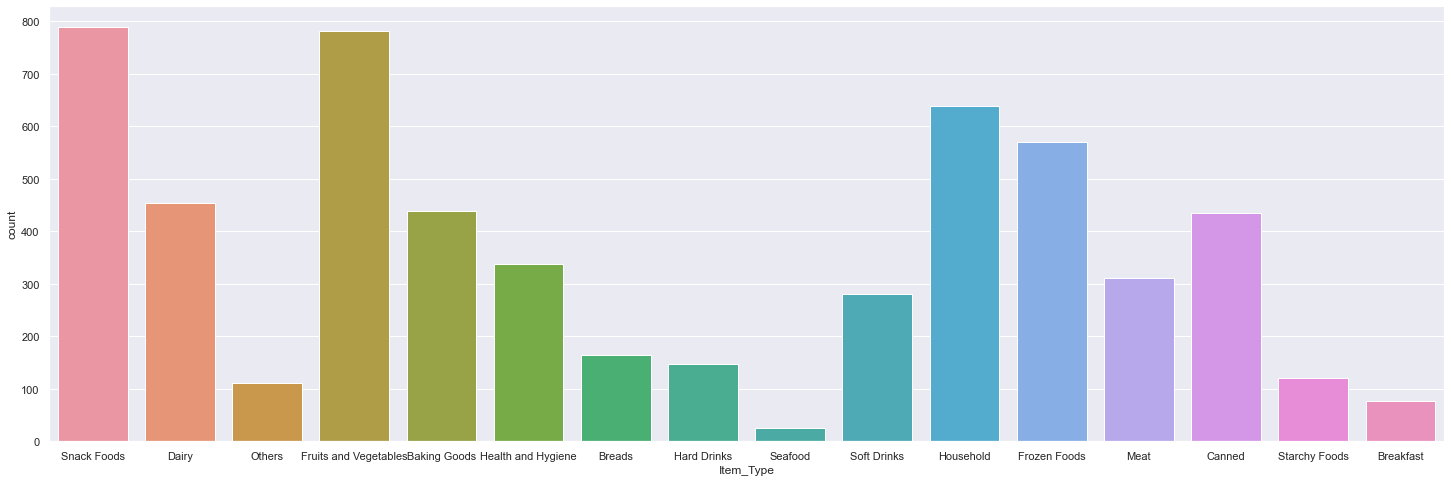

In [27]:
# Item_Type  column
plt.figure(figsize=(25,8))
sns.countplot(x='Item_Type',data =df)
plt.show()

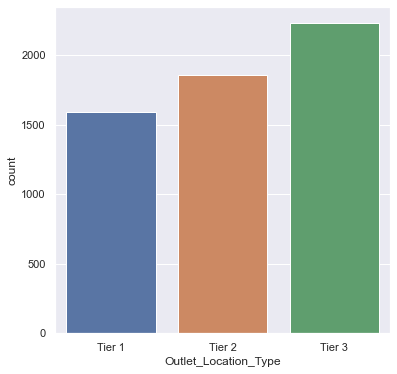

In [28]:
# Outlet_Location_Type column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type',data =df)
plt.show()

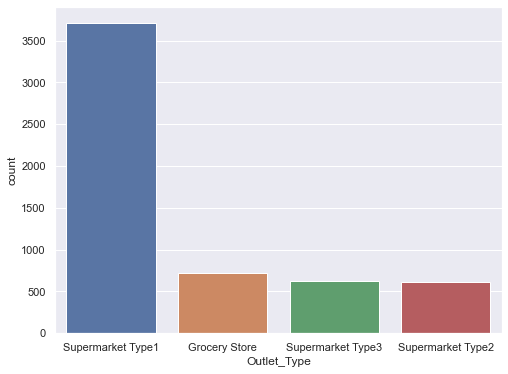

In [29]:
# Outlet_Type column
plt.figure(figsize=(8,6))
sns.countplot(x='Outlet_Type',data =df)
plt.show()

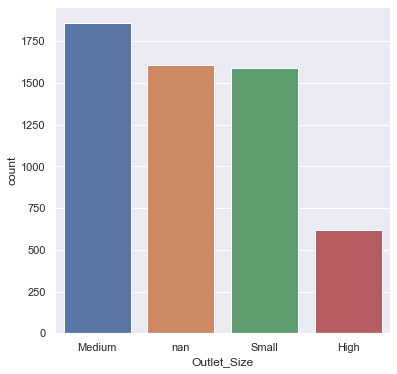

In [30]:
# Outlet_Location_Type column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data =df)
plt.show()

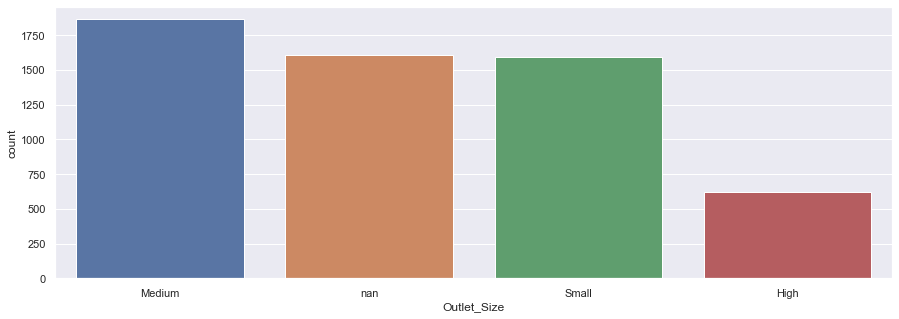

In [31]:
# Outlet_Size column
plt.figure(figsize=(15,5))
sns.countplot(data =df.astype({'Outlet_Size':'str'}),x='Outlet_Size')
plt.show()

# Data Pre Processing

In [32]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,nan,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,nan,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,nan,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [33]:
df['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [34]:
df.replace({'Item_Fat_Content':{'reg':'Regular','LF':'Low Fat','low fat':'Low Fat'}},inplace=True)

In [35]:
df['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

# Lable Encoding

In [36]:
encoder=LabelEncoder()

In [37]:
df['Item_Identifier']=encoder.fit_transform(df['Item_Identifier'])

In [38]:
df['Item_Fat_Content']=encoder.fit_transform(df['Item_Fat_Content'])

In [39]:
df['Item_Type']=encoder.fit_transform(df['Item_Type'])

In [40]:
df['Outlet_Identifier']=encoder.fit_transform(df['Outlet_Identifier'])

In [41]:

df['Outlet_Location_Type']=encoder.fit_transform(df['Outlet_Location_Type'])

In [42]:
df['Outlet_Type']=encoder.fit_transform(df['Outlet_Type'])

In [43]:
df['Outlet_Size']=encoder.fit_transform(df['Outlet_Size'])

In [44]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,3,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


In [46]:
df_test=df
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,3,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,1,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600000,1,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000000,0,0.073529,8,118.7440,7,2002,3,1,1
5679,517,15.300000,1,0.000000,3,214.6218,2,2007,3,1,1


In [48]:
df_train=pd.read_csv('D:/shree/df.csv')

In [49]:
df_train

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850
8520,8520,1357,10.600,0,0.035186,8,85.1224,6,2004,3,1,1,1193.1136
8521,8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [55]:
x_train=df_train.drop(columns='Item_Outlet_Sales',axis=1)

In [56]:
x_train.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1
1,1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2
2,2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1
3,3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0
4,4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1


In [57]:
y_train=df_train['Item_Outlet_Sales']
y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [59]:
x_test=df_test
x_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,3,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


In [61]:
print(x_train.shape,x_test.shape)

(8523, 12) (5681, 11)


# ML MOdel

In [62]:
regressor=XGBRegressor()

In [63]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [64]:
training_data_prediction=regressor.predict(x_train)

In [65]:
r2_train=metrics.r2_score(y_train,training_data_prediction)

In [66]:
print('R squared value =' ,r2_train)

R squared value = 0.844449991756754
